In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df_dataset = pd.read_csv('/content/faults.csv')
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [ ]:
df_dataset.describe()

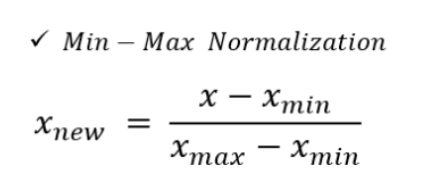

In [ ]:
faults_norm = (df_dataset - df_dataset.min()) / (df_dataset.max() - df_dataset.min()) 

In [ ]:
faults_norm.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,0.334977,0.359254,0.126645,0.126648,0.012393,0.010515,0.004516,0.017778,0.416496,0.431452,0.409454,0.400309,0.599691,0.148991,0.333315,0.438821,0.567175,0.036438,0.604838,0.803985,0.575734,0.448807,0.373115,0.329507,0.541831,0.528699,0.529422,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,0.305390,0.291180,0.136706,0.136707,0.033858,0.028832,0.023496,0.044197,0.158297,0.086532,0.254987,0.490087,0.490087,0.211869,0.301157,0.145420,0.273327,0.067430,0.246831,0.246189,0.482352,0.161577,0.173673,0.106686,0.252619,0.090656,0.385303,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029912,0.110006,0.035786,0.035788,0.000537,0.001244,0.000661,0.000800,0.310345,0.402778,0.231041,0.000000,0.000000,0.000000,0.060691,0.334569,0.355954,0.005833,0.403206,0.576293,0.000000,0.332459,0.252064,0.253411,0.331719,0.489884,0.146652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.255132,0.270919,0.092244,0.092244,0.001127,0.002297,0.001322,0.001635,0.443350,0.416667,0.241623,0.000000,1.000000,0.115385,0.228396,0.436593,0.551881,0.009835,0.631088,0.944725,1.000000,0.397239,0.315567,0.310470,0.547839,0.527666,0.439614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.617595,0.624927,0.167658,0.167658,0.005372,0.007849,0.004518,0.007140,0.522167,0.476852,0.746032,1.000000,1.000000,0.153846,0.576568,0.531412,0.816678,0.025160,0.797078,1.000000,1.000000,0.535339,0.439039,0.406791,0.757855,0.568129,0.999773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
faults_shuffle = faults_norm.sample(frac = 1)
print(faults_shuffle[:5])

      X_Minimum  X_Maximum  Y_Minimum  ...  Dirtiness  Bumps  Other_Faults
198    0.412317   0.417788   0.047101  ...        0.0    0.0           0.0
1128   0.439296   0.447045   0.025451  ...        0.0    1.0           0.0
1333   0.584751   0.588063   0.070400  ...        0.0    0.0           1.0
1122   0.773021   0.775307   0.175683  ...        0.0    1.0           0.0
1411   0.602346   0.603862   0.217941  ...        0.0    0.0           1.0

[5 rows x 34 columns]


In [ ]:
faults_np = faults_shuffle.to_numpy()
print(type(faults_np))

<class 'numpy.ndarray'>


In [ ]:
train_ratio = 0.93
input_cnt   = 27
output_cnt  = 7

In [ ]:
test_begin_index = int(len(faults_np) * train_ratio)
print("test_begin_index : ", test_begin_index)

test_begin_index :  1805


In [ ]:
# train_X, train_Y = faults_np[ 행 , 열 ]
train_X, train_Y = faults_np[ :test_begin_index , : -output_cnt], faults_np[ :test_begin_index , -output_cnt: ]
test_X, test_Y   = faults_np[ test_begin_index: , : -output_cnt], faults_np[ test_begin_index: , -output_cnt: ]
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(1805, 27)
(1805, 7)
(136, 27)
(136, 7)


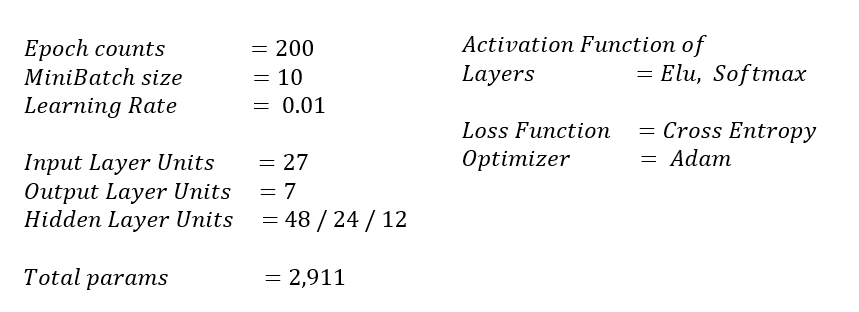

In [ ]:
GJ_NET_MODEL = tf.keras.Sequential([
                                    tf.keras.layers.Dense(units = 48,
                                                          activation = 'elu',
                                                          input_shape = (27,)),
                                    tf.keras.layers.Dense(units = 24,
                                                          activation = 'elu'),
                                    tf.keras.layers.Dense(units = 12,
                                                          activation = 'elu'),
                                    tf.keras.layers.Dense(units = 7,
                                                          activation = 'softmax')
])

In [ ]:
GJ_NET_MODEL.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 91        
Total params: 2,911
Trainable params: 2,911
Non-trainable params: 0
_________________________________________________________________


In [ ]:
GJ_NET_MODEL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                     loss = 'categorical_crossentropy')

In [ ]:
history_1 = GJ_NET_MODEL.fit(train_X, train_Y,
                             epochs = 300, batch_size = 10)

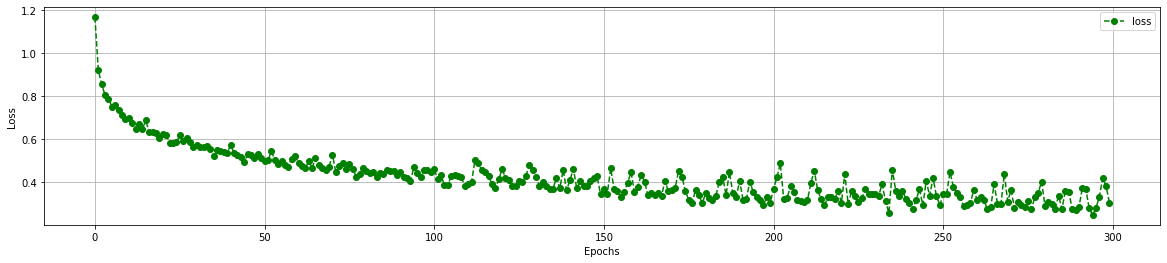

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(history_1.history['loss'], '--o', color = 'green', label = 'loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()

In [ ]:
pred_Y = GJ_NET_MODEL.predict(test_X)
print(pred_Y)

In [ ]:
pred_Y = np.argmax(pred_Y, axis = 1)
print(pred_Y)

[4 5 2 0 6 2 2 3 6 6 6 2 2 6 6 2 2 2 6 2 5 6 6 1 5 6 2 5 5 6 5 2 6 5 1 5 3
 6 6 6 2 0 3 2 5 5 1 3 1 5 2 5 6 6 6 0 3 6 5 5 5 1 6 2 2 5 5 5 2 5 6 5 1 1
 2 6 2 6 6 1 3 6 1 6 1 0 6 2 6 6 6 5 3 5 1 2 5 2 5 6 5 6 0 5 5 6 6 1 2 0 5
 6 6 5 5 2 6 5 2 0 6 6 3 2 4 2 2 2 2 1 1 1 2 6 1 6]


In [ ]:
test_Y = np.argmax(test_Y, axis=1)
print(test_Y)

[4 5 2 4 5 2 2 3 6 6 5 2 2 6 0 2 6 2 6 2 5 5 5 1 6 5 2 5 5 5 5 2 5 6 1 5 3
 5 3 6 2 0 3 2 5 5 1 3 6 6 2 5 4 6 2 0 3 6 6 5 5 1 5 2 2 5 6 5 2 4 6 0 1 6
 2 6 2 5 0 1 3 0 1 6 1 0 6 2 6 6 6 6 3 5 1 2 5 2 6 6 6 6 6 5 5 1 4 1 2 6 5
 6 6 5 1 2 6 5 2 6 6 5 6 2 4 2 2 2 2 1 1 1 2 6 1 6]


In [ ]:
acc = np.mean(np.equal(pred_Y, test_Y))

In [ ]:
print("GJ_NET_MODEL ACC : {} %".format(np.round(acc * 100,2)))

GJ_NET_MODEL ACC : 72.06 %


In [ ]:
GJ_NET_MODEL.weights[0]

<tf.Variable 'dense/kernel:0' shape=(27, 48) dtype=float32, numpy=
array([[-0.8912321 ,  1.8214372 , -0.21117614, ..., -0.05640367,
         0.56969225, -0.20172994],
       [-0.488667  ,  1.5082209 , -0.54143155, ...,  0.05089623,
         0.40869102, -0.31649432],
       [ 1.1086965 , -6.249013  , -0.27939522, ..., -0.62885803,
         2.9507318 ,  2.2508233 ],
       ...,
       [ 1.3771594 ,  0.42769873,  0.04637877, ..., -2.5650022 ,
        -0.83469373,  2.1271386 ],
       [-0.06090142,  1.4575622 , -0.07960727, ..., -0.71253735,
         2.9061058 , -2.3874323 ],
       [ 1.3229275 ,  1.0360996 ,  0.55184186, ...,  1.8289934 ,
        -2.5127463 ,  1.1290734 ]], dtype=float32)>

In [ ]:
GJ_NET_MODEL.weights[5]

<tf.Variable 'dense_2/bias:0' shape=(12,) dtype=float32, numpy=
array([ 0.04790867, -0.58302754, -4.7168126 , -1.9259015 , -4.0354843 ,
       -1.1408004 , -4.3205285 , -4.707156  , -1.4490173 , -4.8598533 ,
       -7.0692043 , -1.5440916 ], dtype=float32)>

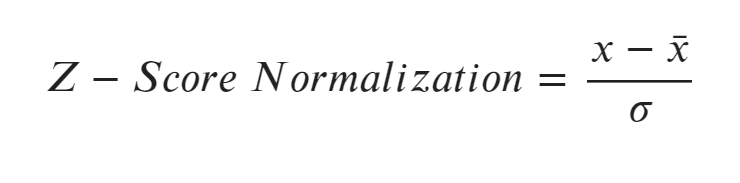

In [ ]:
df = pd.read_csv('/content/abalone.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
import csv 

with open('/content/abalone.csv') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)

    rows = []
    for row in csvreader:
        rows.append(row)

In [ ]:
rows[:5]

[['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15', '15'],
 ['M', '0.35', '0.265', '0.09', '0.2255', '0.0995', '0.0485', '0.07', '7'],
 ['F', '0.53', '0.42', '0.135', '0.677', '0.2565', '0.1415', '0.21', '9'],
 ['M', '0.44', '0.365', '0.125', '0.516', '0.2155', '0.114', '0.155', '10'],
 ['I', '0.33', '0.255', '0.08', '0.205', '0.0895', '0.0395', '0.055', '7']]

In [ ]:
input_cnt  = 10
output_cnt = 1

data = np.zeros([len(rows), input_cnt + output_cnt])
print(data.shape)

(4177, 11)


In [ ]:
for n,row in enumerate(rows):
    if row[0] == 'M' : data[n,0] = 1
    if row[0] == 'F' : data[n,1] = 1
    if row[0] == 'I' : data[n,2] = 1
    data[n,3 :] = row[1:]

In [ ]:
data[:5]

array([[ 1.    ,  0.    ,  0.    ,  0.455 ,  0.365 ,  0.095 ,  0.514 ,
         0.2245,  0.101 ,  0.15  , 15.    ],
       [ 1.    ,  0.    ,  0.    ,  0.35  ,  0.265 ,  0.09  ,  0.2255,
         0.0995,  0.0485,  0.07  ,  7.    ],
       [ 0.    ,  1.    ,  0.    ,  0.53  ,  0.42  ,  0.135 ,  0.677 ,
         0.2565,  0.1415,  0.21  ,  9.    ],
       [ 1.    ,  0.    ,  0.    ,  0.44  ,  0.365 ,  0.125 ,  0.516 ,
         0.2155,  0.114 ,  0.155 , 10.    ],
       [ 0.    ,  0.    ,  1.    ,  0.33  ,  0.255 ,  0.08  ,  0.205 ,
         0.0895,  0.0395,  0.055 ,  7.    ]])

In [ ]:
train_ratio = 0.8


In [ ]:
test_begin_index = int(data.shape[0] * train_ratio)
print("test_begin_index : ", test_begin_index)

test_begin_index :  3884


In [ ]:
shuffle_map = np.arange(data.shape[0])
np.random.shuffle(shuffle_map)
print(shuffle_map[:5])

[ 749 3245  564 3366  111]


In [ ]:
train_data = data[shuffle_map[:test_begin_index]]
print(train_data.shape)

(3884, 11)


In [ ]:
test_data = data[shuffle_map[test_begin_index:]]
print(test_data.shape)

(293, 11)


In [ ]:
train_X, train_Y = train_data[:,:-output_cnt], train_data[:,-output_cnt : ]
test_X, test_Y   = test_data[:,:-output_cnt], test_data[:,-output_cnt : ]

In [ ]:
print(train_X.shape)
print(train_Y.shape)

print(test_X.shape)
print(test_Y.shape)

(3884, 10)
(3884, 1)
(293, 10)
(293, 1)
